In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras import regularizers
import os as os
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline

Using TensorFlow backend.


 # Step 1: Design the CNN architecture. After designing the architecture, print it in iPython Notebook. 


In [3]:
model = Sequential()

#Convolution and Max Pooling layers
model.add(Conv2D(32, (3,3), input_shape=(128,128,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation = "relu") )
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation = "relu") )
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation = "relu") )
model.add(MaxPooling2D(pool_size = (2,2)))

#Flattening layer.
model.add(Flatten ())

#Fully Connected Hidden Layer
model.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#Fully Connected Output Layer
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Summary of the Architecture
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        9248      
__________

# Step 2: Load Images and Prepare the Network for training

In [4]:
#Training dataset generator
train_datagen = image.ImageDataGenerator(rescale=1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Validation dataset generator
validation_datagen = image.ImageDataGenerator(rescale = 1./255)

# Loading the training set
training_set = train_datagen.flow_from_directory('./dataset/training_set',target_size=(128,128), batch_size=32, class_mode='binary')

# Loading the validation dataset 
validation_set = validation_datagen.flow_from_directory('./dataset/validation_set',target_size=(128,128), batch_size=32, class_mode='binary')


Found 25000 images belonging to 2 classes.
Found 3200 images belonging to 2 classes.


# Step 3: Run the CNN Network

In [5]:
# Steps_per_epoch = 718 because there are 23000 training images and a batch size of 32.
# To ensure we run through the entire training set in one epoch, we need to run 23000/32 = 718 
# different batches.
#
# Validation_steps = 63 because we have 2000 validation images and a batch size of 32,
# To ensure that we run through the entire validation set at the end of each epoch we need
# to run 2000/32 = 63 batches.   

history = model.fit_generator(training_set, steps_per_epoch=782, epochs=40, validation_data = validation_set, validation_steps=100, verbose=1)
model.save('Cat-Dog-128x128-3layer-maxpooling.h5')
print("Saved model to disk")

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
782/782 [==============================] - 393s 503ms/step - loss: 0.7572 - acc: 0.5025 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/40
782/782 [==============================] - 339s 433ms/step - loss: 0.6932 - acc: 0.4926 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/40
782/782 [==============================] - 338s 432ms/step - loss: 0.6932 - acc: 0.5002 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 4/40
782/782 [==============================] - 338s 432ms/step - loss: 0.6933 - acc: 0.4944 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/40
782/782 [==============================] - 339s 434ms/step - loss: 0.6923 - acc: 0.5185 - val_loss: 0.6843 - val_acc: 0.5600
Epoch 6/40
782/782 [==============================] - 337s 431ms/step - loss: 0.6836 - acc: 0.5664 - val_loss: 0.6780 - val_acc: 0.5928
Epoch 7/40
782/782 [==============================] - 337s 431ms/step - loss: 0.6279 - acc: 0.6620 - val_loss: 0.5577 - val_acc: 0.7306


In [ ]:
model.save('Cat-Dog-128x128-3layer-maxpooling.h5')
model.save_weights('Cat-Dog-128x128-3layer-maxpooling.h5')
print("Saved model to disk")

Saved model to disk


# Step 5: Plot the training and Validation Loss/Accuracy

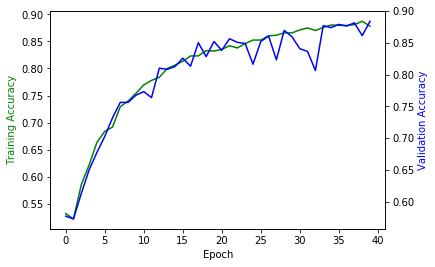

[]

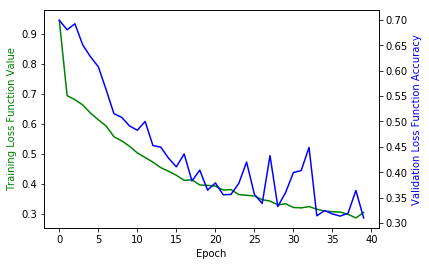

In [14]:
y1 = history.history['acc']
y2 = history.history['val_acc']
y3 = history.history['loss']
y4 = history.history['val_loss']
x = range(0, len(y1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Accuracy', color='g')
ax2.set_ylabel('Validation Accuracy', color='b')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y3, 'g-')
ax2.plot(x, y4, 'b-')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss Function Value', color='g')
ax2.set_ylabel('Validation Loss Function Accuracy', color='b')

plt.plot()

# Step 6: Predict Dog/Cat using the Trained Model

In [ ]:
model=load_model('Cat-Dog-128x128-3layer-maxpooling.h5')

correct = 0
wrong = 0
images = [os.path.basename(x) for x in glob.glob('dataset/test_set/cats/*.jpg')]
length = len(images)
for i in range(0,length):
    pic = 'dataset/test_set/cats/' + images[i]
    test_image=image.load_img(pic, target_size=(128,128))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    if (result[0][0] < 0.5):
        correct=correct+1
    else:
        wrong=wrong+1
        
images = [os.path.basename(x) for x in glob.glob('dataset/test_set/dogs/*.jpg')]
length = len(images)
for i in range(0,length):
    pic = 'dataset/test_set/dogs/' + images[i]
    test_image=image.load_img(pic, target_size=(128,128))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    if (result[0][0] > 0.5):
        correct=correct+1
    else:
        wrong=wrong+1
        
print(correct/(correct + wrong))

0.7633333333333333
